# A Countries' Secret to Happiness
> Answering the question "What makes us happy?"

## Introduction

As part of the Final Project for A1C1 Univ.ai's Course, the team - Vishnu, Sakthisree, Neigil and Rishab - started their journey to leverage Machine Learning for trying to answer the age-old question of - **what exactly makes us happy?**

The World Happiness Report may be a point of interest survey of the state of worldwide bliss. The primary report was distributed in 2012, the second in 2013, the third in 2015, and the fourth within the 2016 Upgrade. The World Joy 2017, which positions 155 nations by their bliss levels, was discharged at the Joined together Countries at an occasion celebrating Universal Day of Joy on Walk 20th. 

![title](img/title.png.jpg)

The report proceeds to pick up worldwide acknowledgment as governments, organizations and respectful society progressively utilize joy pointers to educate their policy-making choices. Driving specialists over areas – financial matters, brain research, overview investigation, national insights, wellbeing, open approach and more – depict how estimations of well-being can be used effectively to evaluate the advance of countries. 

The reports survey the state of bliss within the world nowadays and appear how the modern science of bliss clarifies individual and national varieties in bliss.

There are six measurements taken per country for guaging the World Happiness Index. They consist of:

1. GDP per Capita - Gross Domestic Product per capita for the countries

2. Family - Satisfaction Rank of Family

3. Life Expectancy - Avg. expected years to live

4. Freedom - Perception of freedom quantified

5. Generosity - Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.

6. Trust/Government Corruption - A quantification of the people's perceived trust in their governments.

7. Dystopia Score - Score based on comparison to hypothetically the saddest country in the world.

8. Dystopia Residual - Rank of any country in a particular year.

The Happiness Score is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder.

The joy scores and rankings utilize information from the Gallup World Survey. The scores are based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 

The scores are from broadly agent tests for the a long time 2013-2016 and utilize the Gallup weights to create the gauges agent. The columns taking after the bliss score assess the degree to which each of six variables – financial generation, social back, life anticipation, flexibility, nonattendance of debasement, and liberality – contribute to making life assessments higher in each nation than they are in


**What is DYSTOPIA RESIDUAL?**

Dystopia is a hypothetical country consisting of the least happy people. It was formed so as to create a benchmark to compare Happiness Scores of other countries with it. 

The Dystopia Residual is calculated as (Score of Dystopia+ Residual for the corresponding country). 

Here the Residual is a value generated for each country, which indicates if the 6 variables have under or over explained the life evaluations for each country for that particular year.


## Problem Statement

Given the data available per country to guage the Hapiness Index, our aim is to:
    
1. **Part A** - Analyze and understand which factors affect the Happiness Index Score of countries
2. **Part B** - Analyze and understand the relationship between Terror Attacks and Happiness Index
3. **Part C** - Create a Model to predict the Happiness Index of a Country
4. **Part D** - To see how much Health contributes to the Happiness Index? With the current pandemic at hand, predicting COVID-19 Cases in the coming days for countries.
5. **Part E** - Creating a Dashbord for viewing COVID-19 Predictions

---------------------------------------------------------------------------------------------------------------------

## Ground work

### Importing the Necessary Libraries

In [1]:
#hide
#install the necessary packages
!pip install notebook ipywidgets
!pip install altair-viewer

# Jupyter widgets extension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager --no-build

# jupyterlab renderer support
!jupyter labextension install jupyterlab-plotly@4.9.0 --no-build
# FigureWidget support
!jupyter labextension install plotlywidget --no-build

# Build extensions (must be done to activate extensions since --no-build is used above)
!jupyter lab build

# Unset NODE_OPTIONS environment variable
# (OS X/Linux)

In [4]:
#hide
#!pip install bubbly
#!conda install libpython m2w64-toolchain -c msys2
#!pip install pystan
#!pip install fbprophet

In [5]:
#hide
# importing the necessary libraries
import numpy as np
import pandas as pd
import glob
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import json
import altair as alt
from  altair.vega import v5
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from IPython.display import HTML


In [6]:
#hide
#loading individual dataset reports for the years from 2015-2020
happiness_df_2015 = pd.read_csv("data/2015_report.csv")
happiness_df_2016 = pd.read_csv("data/2016_report.csv")
happiness_df_2017 = pd.read_csv("data/2017_report.csv")
happiness_df_2018 = pd.read_csv("data/2018_report.csv")
happiness_df_2019 = pd.read_csv("data/2019_report.csv")
happiness_df_2020 = pd.read_csv("data/2020_report.csv")

#adding column in each dataset to represent year
happiness_df_2015['year'] = 2015
happiness_df_2016['year'] = 2016
happiness_df_2017['year'] = 2017
happiness_df_2018['year'] = 2018
happiness_df_2019['year'] = 2019
happiness_df_2020['year'] = 2020

In [7]:
#hide
df = pd.DataFrame()

#merging all dataframes into one dataframe
df = df.append(happiness_df_2015)
df = df.append(happiness_df_2016)
df = df.append(happiness_df_2017)
df = df.append(happiness_df_2018)
df = df.append(happiness_df_2019)
df = df.append(happiness_df_2020)

#replacing na with 0
df = df.fillna(0)
targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
df["target"] = pd.qcut(df['happiness_score'], len(targets), labels=targets)
df["target_n"] = pd.qcut(df['happiness_score'], len(targets), labels=range(len(targets)))
dff = df.drop(['country','continent','target','target_n','year'], axis = 1)

## Part A

To Analyze and understand which factors affect the Happiness Index Score of countries

## Explaratory Data Analysis

Our objective here is to look through the datasets and perform some basic analysis to understand and guage insights. 

### A look into Correlation

*The Spearman's Rank Correlation Coefficient is used to discover the strength of a link between two sets of data.*

+ If you have two numeric variables that are not linearly related, or if one or both of your variables are ordinal variables, you can still measure the strength and direction of their relationship using a non-parametric correlation statistic. 

+ The most common of these is the Spearman rank correlation coefficient, ρ, which considers the ranks of the values for the two variables.Spearman’s correlation is equivalent to calculating the Pearson correlation coefficient on the ranked data. So ρ will always be a value between -1 and 1. 

+ The further away ρ is from zero, the stronger the relationship between the two variables. The sign of ρ corresponds to the direction of the relationship. If it is positive, then as one variable increases, the other tends to increase. If it is negative, then as one variable increases, the other tends to decrease.

+ You use Spearman’s correlation if your data have a non-linear relationship (like an exponential relationship) or you have one or more outliers. However, Spearman’s correlation is only appropriate if the relationship between your variables is monotonic, meaning that as one variable increases, the other tends to either increase or decrease (not both)

In [8]:
#hide_input
spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix

,dystopia_residual,family,freedom,gdp_per_capita,generosity,government_trust,happiness_score,health,social_support,year
dystopia_residual,1.00,0.56,-0.00,0.06,0.16,0.13,0.23,-0.05,-0.59,0.09
family,0.56,1.00,0.01,0.21,0.23,0.10,0.14,-0.07,-0.86,-0.59
freedom,-0.00,0.01,1.00,0.36,0.33,0.43,0.54,0.40,0.23,0.06
gdp_per_capita,0.06,0.21,0.36,1.00,-0.01,0.26,0.80,0.78,0.14,-0.04
generosity,0.16,0.23,0.33,-0.01,1.00,0.24,0.13,-0.02,-0.18,-0.10
government_trust,0.13,0.10,0.43,0.26,0.24,1.00,0.32,0.18,-0.02,0.02
happiness_score,0.23,0.14,0.54,0.80,0.13,0.32,1.00,0.77,0.24,0.03
health,-0.05,-0.07,0.40,0.78,-0.02,0.18,0.77,1.00,0.38,0.07
social_support,-0.59,-0.86,0.23,0.14,-0.18,-0.02,0.24,0.38,1.00,0.43
year,0.09,-0.59,0.06,-0.04,-0.10,0.02,0.03,0.07,0.43,1.00


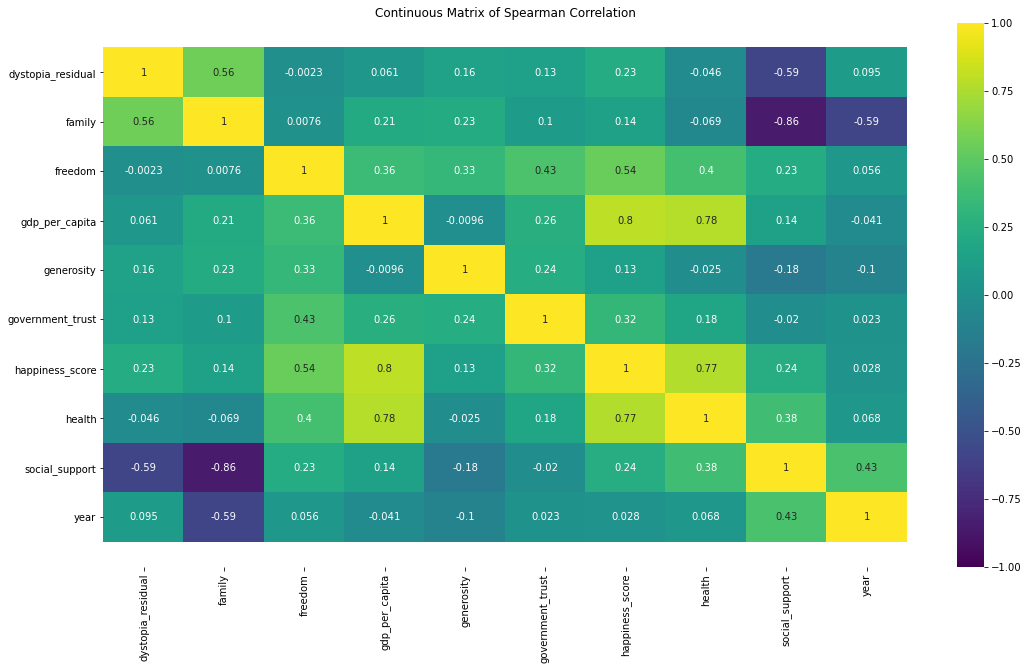

In [9]:
#hide_input
plt.figure(figsize=(18,10))
ax = sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, 
            center=0, cmap="viridis", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Continuous Matrix of Spearman Correlation");

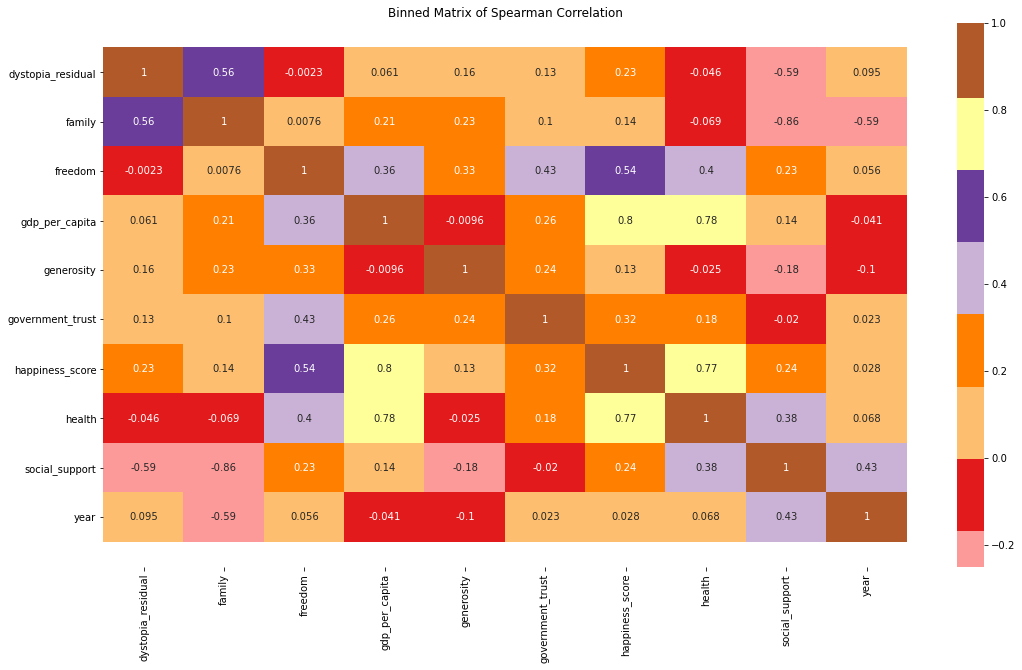

In [10]:
#hide_input
plt.figure(figsize=(18,10))
ax = sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, center=0, cmap="Paired", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Binned Matrix of Spearman Correlation");

**Inference**: From the above matrixes, it seems like *Health*, *GDP Per Capita* and *freedom* are the top 3 factors that correlate with happiness index.

#### Univariate Analysis

This type of analysis consists of use of single variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it. 

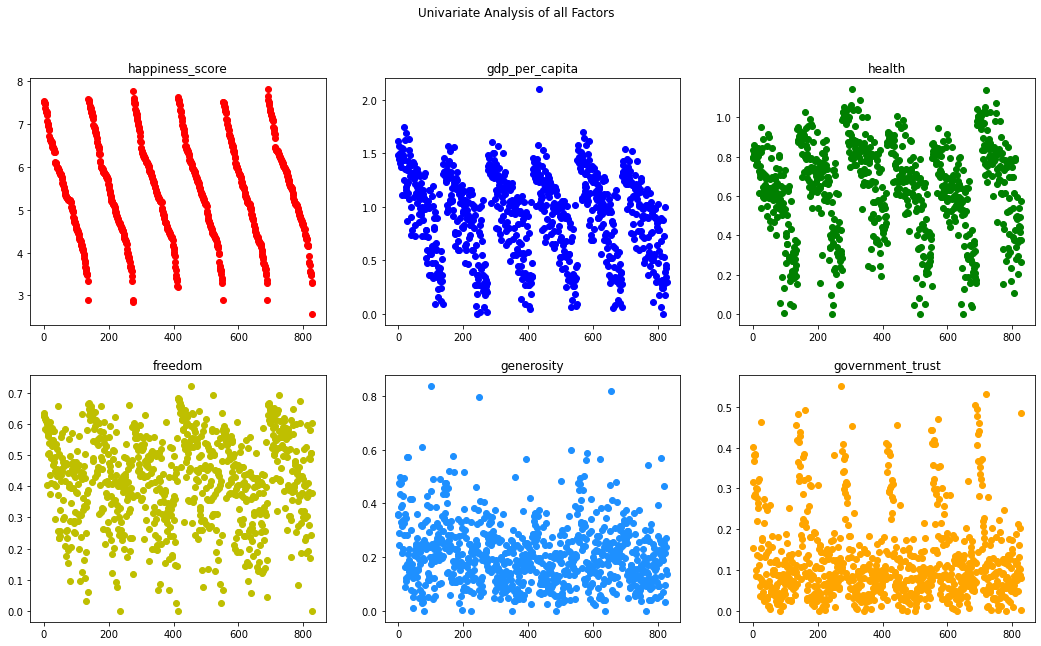

In [11]:
#hide_input
#univariate analysis
numerics = ['happiness_score', 'gdp_per_capita', 'health', 'freedom', 'generosity',
       'government_trust']
color = ['r','blue','g','y','dodgerblue','orange']

plt.figure(figsize = (18,10))
plt.suptitle("Univariate Analysis of all Factors")
for i in numerics:
    plt.subplot(2,3,numerics.index(i)+1)
    plt.scatter(np.arange(df.shape[0]),df[i], color = color[numerics.index(i)])
    plt.title(i)
plt.show()

#### Bivariate Analysis

This type of analysis involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables

**Inference**:

From the above plot, we can infer that there seems to be a: <br/>
**Linear Relationship:** happiness_score v/s gdp_per_capita, happiness_score v/s health, happiness_score v/s freedom <br/>
**Non-Linear Relationship:** happiness_score v/s gerosity, happiness_score v/s government_trust

### Performing ANOVA test between predictors and response variable to guage how significantly it affects the scoring

Analysis of Variance is a statistical method, used to check the means of two or more groups that are significantly different from each other. It assumes Hypothesis as
H0: Means of all groups are equal.
H1: At least one mean of the groups are different.
    
+ If the distributions overlap or close, the grand mean will be similar to individual means whereas if distributions are far, the grand mean and individual means differ by larger distance.
+ It refers to variations between the groups as the values in each group are different. 
+ So in ANOVA, we will compare Between-group variability to Within-group variability.
+ ANOVA uses F-test check if there is any significant difference between the groups. 
+ If there is no significant difference between the groups that all variances are equal, the result of ANOVA’s F-ratio will be close to 1.

In [12]:
#hide_input
#performing ANOVA test
k_best = SelectKBest(f_classif,k="all")
k_best.fit_transform(dff.drop('happiness_score', axis=1), dff['happiness_score'])
p_values = pd.DataFrame({'column': dff.drop('happiness_score', axis=1).columns, 'p_value': k_best.pvalues_}).sort_values('p_value')
best_predictors = p_values[p_values['p_value'] < .05].iloc[:10,:]['column'].to_list()
print("The best predictors of Happiness Index are: ")
print(str(best_predictors))

The best predictors of Happiness Index are: 
['gdp_per_capita', 'government_trust', 'health', 'family']


Two of the aspects coming out of ANOVA test belong to our correlation inference i.e GDP per capita and health. Apart from that, it seems like government trust and family also play quite a significant role in realizing the happiness score.

### Looking at all countries and their ranks in Happiness Index Score

In [13]:
#hide_input
fig = px.bar(df, x='country', y='happiness_score',color='happiness_score',height=800)
fig.update_layout(title='Arrangement of countries in descending order of Happiness Score',titlefont_size=20)

display(HTML(fig.to_html(include_plotlyjs='cdn')));

**Inference**: Clearly Norwary seems to the top country scoring in Happiness Index. It is not surprising since European Countries have better living conditions. 

### Happiness with regards to Generosity and Economy

**Inference**: The farther right side bubbless are mostly contries in the European Continents. Clearly they have better GDP Per capita. Surprisingly Europeans countries score average on Generosity(Asian countries have highest generosity) but have the most Happiness Score rankings. 